In [1]:
#importing the required libraries and metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
#accesing the data from the folder and putting it to the dataframe
w=pd.read_csv('C:/Users/hp/Downloads/Github/dataset1-master/winequality-red.csv')
wine=pd.DataFrame(w)

#lets take a look for the structure of data
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


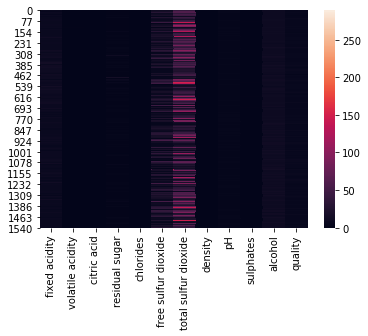

In [3]:
#verifying for the null values using heatmap
sns.heatmap(wine)

In [4]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
#checking for the no. of occurence of each quality
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
#getting info for each columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#check for skew in data columns
wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [8]:
#handling skew more than 0.55 in all columns
for col in wine.columns:
    if wine[col].skew()>0.55:
        wine[col]=np.log1p(wine[col])

In [9]:
#Let describe our data for statistical overview
wine.describe()

#from the details,we get there is outliers in some of the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,2.215842,0.417173,0.270976,1.218131,0.083038,2.639013,3.634750,0.996747,3.311113,0.501073,2.431458,5.636023
std,0.178100,0.114926,0.194801,0.269969,0.038991,0.623790,0.682575,0.001887,0.154386,0.093731,0.090434,0.807569
min,1.722767,0.113329,0.000000,0.641854,0.011929,0.693147,1.945910,0.990070,2.740000,0.285179,2.240710,3.000000
25%,2.091864,0.329304,0.090000,1.064711,0.067659,2.079442,3.135494,0.995600,3.210000,0.438255,2.351375,5.000000
50%,2.186051,0.418710,0.260000,1.163151,0.076035,2.708050,3.663562,0.996750,3.310000,0.482426,2.415914,6.000000
75%,2.322388,0.494696,0.420000,1.280934,0.086178,3.091042,4.143135,0.997835,3.400000,0.548121,2.493205,6.000000
max,2.827314,0.947789,1.000000,2.803360,0.476855,4.290459,5.669881,1.003690,4.010000,1.098612,2.766319,8.000000


In [10]:
#importing zscore to manage outliers
from scipy.stats import zscore
z=np.abs(zscore(wine))
wine_new=wine[(z<3).all(axis=1)]

#shape after implying zscore
wine_new.shape

(1480, 12)

In [11]:
#Lets get the original shape

wine.shape

(1599, 12)

In [12]:
#It is clear to select the data we get after implying zscore
wine=wine_new

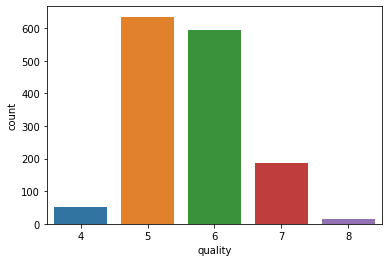

In [13]:
sns.countplot(wine['quality'])
#it shows that quality 5 and quality 6 are in maximum among all

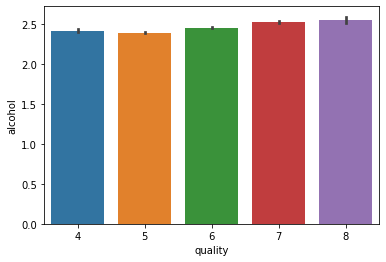

In [14]:
#plotting graph wrt to alcohol in th quality
sns.barplot(x='quality',y='alcohol',data=wine)

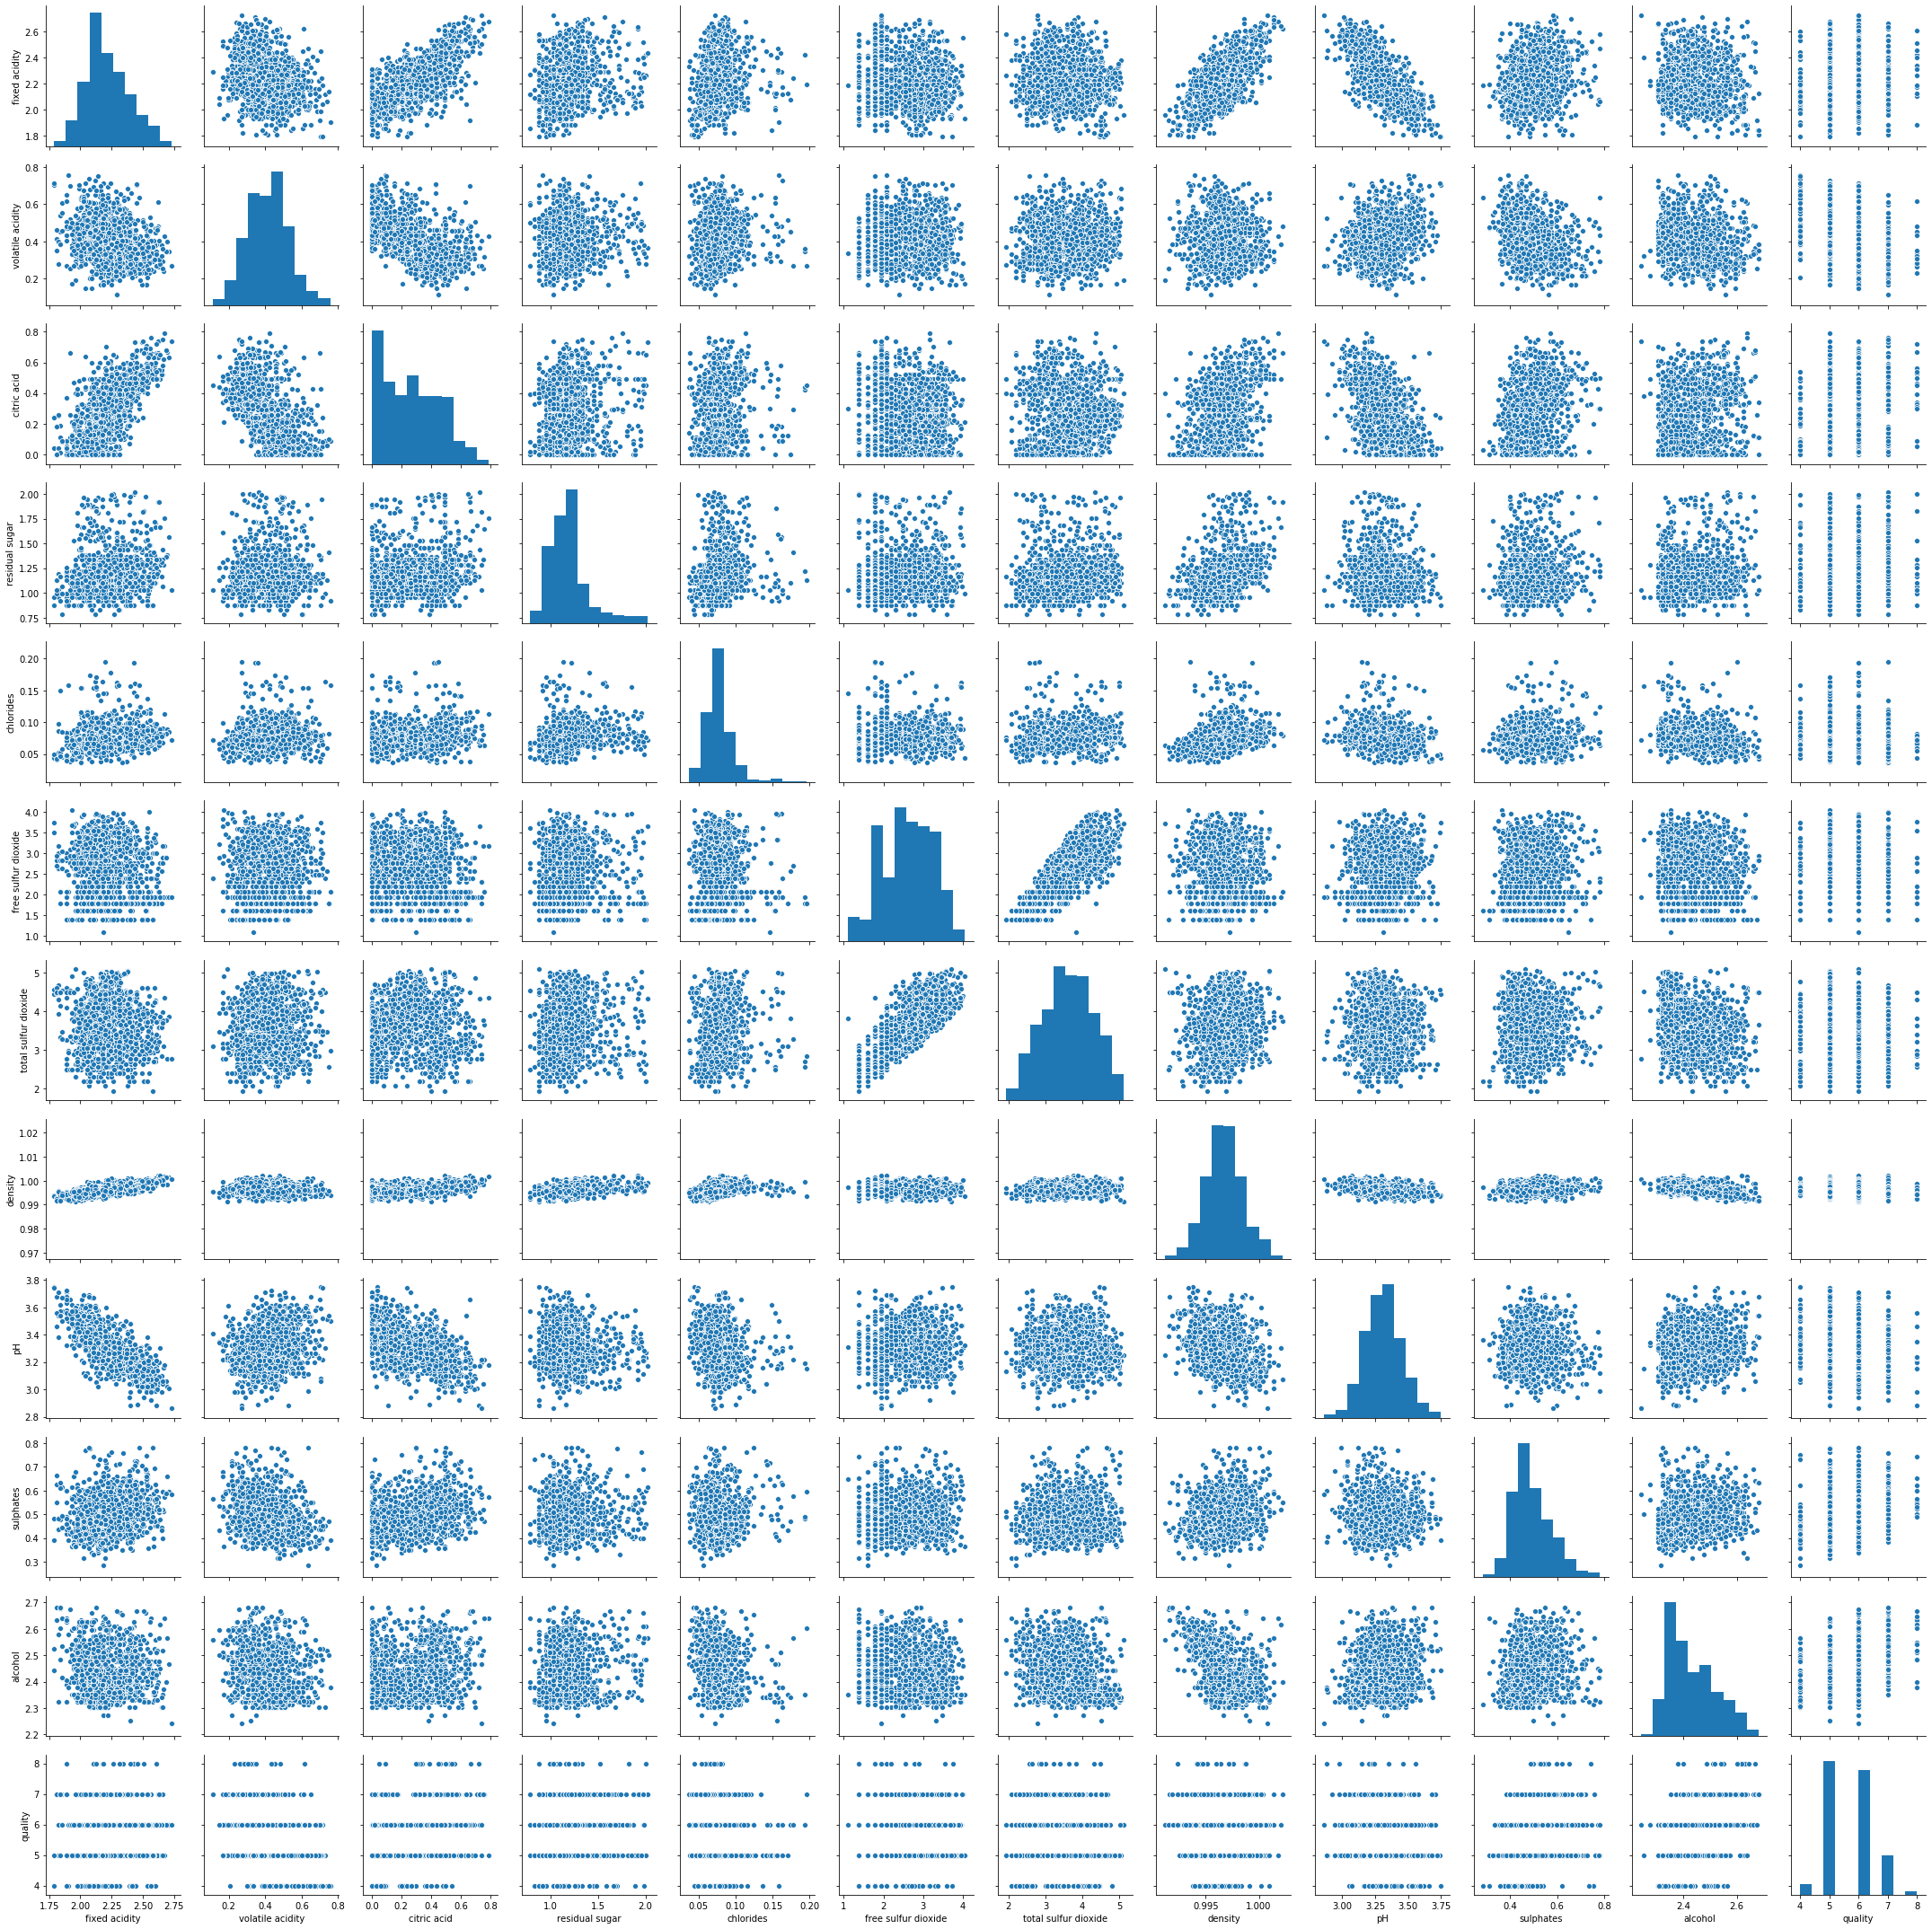

In [15]:
sns.pairplot(wine)

In [16]:
#seperating the input and target variables
x=wine.drop('quality',axis=1)
y=wine['quality']

In [17]:
#importing the warnings
import warnings
warnings.filterwarnings('ignore')


#creating a function to determine random_state
def random(alg):
    r_state=0
    for r_score in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        r2scr=r2_score(y_test,pred)
        if r2scr > r_state:
            r_state=r2scr
            final_r=r_score
    print(r_state,'at',final_r)

In [18]:
#creating the function for algorithm operations and metrics
def model(a):
    ml=a
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    score=ml.score(x_train,y_train)
    print('mean_squared_error',mean_squared_error(y_test,pred))
    print('mean_absolute_error',mean_absolute_error(y_test,pred))
    print('r2_score',r2_score(y_test,pred))

In [19]:
#function for cross_val_score
def cross_val(alg):
    cvscore=cross_val_score(alg,x,y,cv=5)
    print(cvscore)
    print(cvscore.mean())
    print(cvscore.std())

In [20]:
#importing linear regression
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
random(lm)

0.4519851956964922 at 57


In [21]:
cross_val(lm)

[0.23612038 0.34289527 0.41481191 0.37522202 0.26993033]
0.3277959819641863
0.06603308100869601


In [22]:
#importing decision tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
random(dtr)

0.19744367633162574 at 98


In [23]:
cross_val(dtr)

[-0.4060981  -0.36039219 -0.1920559  -0.4459026  -0.38688517]
-0.3582667915733081
0.08765552673117209


In [24]:
#importing k-neighbors algorithm
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

#getting best neighbours
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knr,parameters)
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 20}

In [25]:
#getting the random state value
knr=KNeighborsRegressor(n_neighbors=20)
random(knr)

0.316315933672373 at 57


In [26]:
cross_val(knr)

[0.226597   0.1666931  0.2740434  0.11296843 0.11844095]
0.17974857559317345
0.06240984818548603


In [27]:
#importing support vector machine
from sklearn.svm import SVR
svm=SVR()

In [28]:
#getting proper parameters/kernel for the solution
parameters={'kernel':['rbf','linear'],'C':[1,10,100,1000]}
grd=GridSearchCV(svm,parameters)
grd.fit(x,y)
grd.best_params_

{'C': 100, 'kernel': 'rbf'}

In [29]:
#getting the random_state for svm
svm=SVR(kernel='rbf')
random(svm)

0.4281199226674618 at 57


In [30]:
cross_val(svm)

[0.30114478 0.31391953 0.39763203 0.2468503  0.28318342]
0.3085460093886767
0.04993914873895262


In [31]:
#implying ensemble techniques

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
parameters={'n_estimators':[10,100,500,1000]}
gd=GridSearchCV(rfr,parameters)
gd.fit(x,y)
gd.best_params_

{'n_estimators': 500}

In [32]:
rfr=RandomForestRegressor(n_estimators=500)
random(rfr)

0.5243338612161611 at 97


In [33]:
cross_val(rfr)

[0.30018367 0.38268668 0.38631776 0.30626515 0.26097998]
0.327286645534875
0.0492481144857682


In [34]:
#importing gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

#determing best estimators using gridsearchcv
parameters={'learning_rate':[1,0.1,0.001,0.01],"n_estimators":[10,100,500,1000]}
grid=GridSearchCV(gbr,parameters)
grid.fit(x,y)
grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [35]:
#getting the random state for fradient boosting
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
random(gbr)

0.47468581972026425 at 57


Random forest regressor has best score over all the algorithms,so we take it as a final algorithm

In [38]:
#implying all the calculations using random_forest
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=97)
model(rfr)

mean_squared_error 0.29167212269938647
mean_absolute_error 0.3878159509202454
r2_score 0.5256092392055504


In [37]:
#saving the data using joblib
from sklearn.externals import joblib
joblib.dump(rfr,'winequality.pkl')

['winequality.pkl']